In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [3]:
# check the data for NaN values or other errors
all_df = pd.read_csv(f"{root_directory}/data/all_data.csv")
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      35672 non-null  int64  
 1   area_percent    35672 non-null  float64
 2   update_time     35672 non-null  float64
 3   delta_time      35672 non-null  float64
 4   plan_length     35672 non-null  int64  
 5   replan_count    35672 non-null  int64  
 6   logging_time    35672 non-null  float64
 7   frame_count     35672 non-null  int64  
 8   known_area      35672 non-null  int64  
 9   seed            35672 non-null  int64  
 10  draw_sim        35672 non-null  bool   
 11  log_plots       35672 non-null  bool   
 12  use_threads     35672 non-null  bool   
 13  n_bots          35672 non-null  int64  
 14  grid_thickness  35672 non-null  int64  
 15  screen_width    35672 non-null  int64  
 16  screen_height   35672 non-null  int64  
 17  min_room_size   35672 non-null 

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
all_df

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,seed,...,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,epsilon_0,epsilon_1,epsilon_2,epsilon_3
0,0,0.1500,0.001725,0.001767,34,4,0.000000,0,60,20,...,100,200,0.23,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,NaN,NaN,NaN,NaN
1,1,0.2000,0.001673,0.003470,30,4,0.000030,1,80,20,...,100,200,0.23,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,NaN,NaN,NaN,NaN
2,2,0.2400,0.001734,0.005239,26,4,0.000017,2,96,20,...,100,200,0.23,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,NaN,NaN,NaN,NaN
3,3,0.2750,0.001862,0.007154,24,5,0.000023,3,110,20,...,100,200,0.23,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,NaN,NaN,NaN,NaN
4,4,0.2950,0.001958,0.009144,20,7,0.000034,4,118,20,...,100,200,0.23,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,35667,0.9950,0.001540,0.175833,46,130,0.000016,88,398,49,...,100,200,0.23,Epsilon_Greedy_Frontier,Rand_Start_Position,Rand_Start_Goal,0.1,0.1,0.1,0.1
35668,35668,0.9950,0.001540,0.177390,42,130,0.000016,89,398,49,...,100,200,0.23,Epsilon_Greedy_Frontier,Rand_Start_Position,Rand_Start_Goal,0.1,0.1,0.1,0.1
35669,35669,0.9950,0.001507,0.178913,38,130,0.000000,90,398,49,...,100,200,0.23,Epsilon_Greedy_Frontier,Rand_Start_Position,Rand_Start_Goal,0.1,0.1,0.1,0.1
35670,35670,0.9975,0.006865,0.185811,34,132,0.000016,91,399,49,...,100,200,0.23,Epsilon_Greedy_Frontier,Rand_Start_Position,Rand_Start_Goal,0.1,0.1,0.1,0.1


In [6]:
all_df['method']

0                Frontier_Random
1                Frontier_Random
2                Frontier_Random
3                Frontier_Random
4                Frontier_Random
                  ...           
35667    Epsilon_Greedy_Frontier
35668    Epsilon_Greedy_Frontier
35669    Epsilon_Greedy_Frontier
35670    Epsilon_Greedy_Frontier
35671    Epsilon_Greedy_Frontier
Name: method, Length: 35672, dtype: object

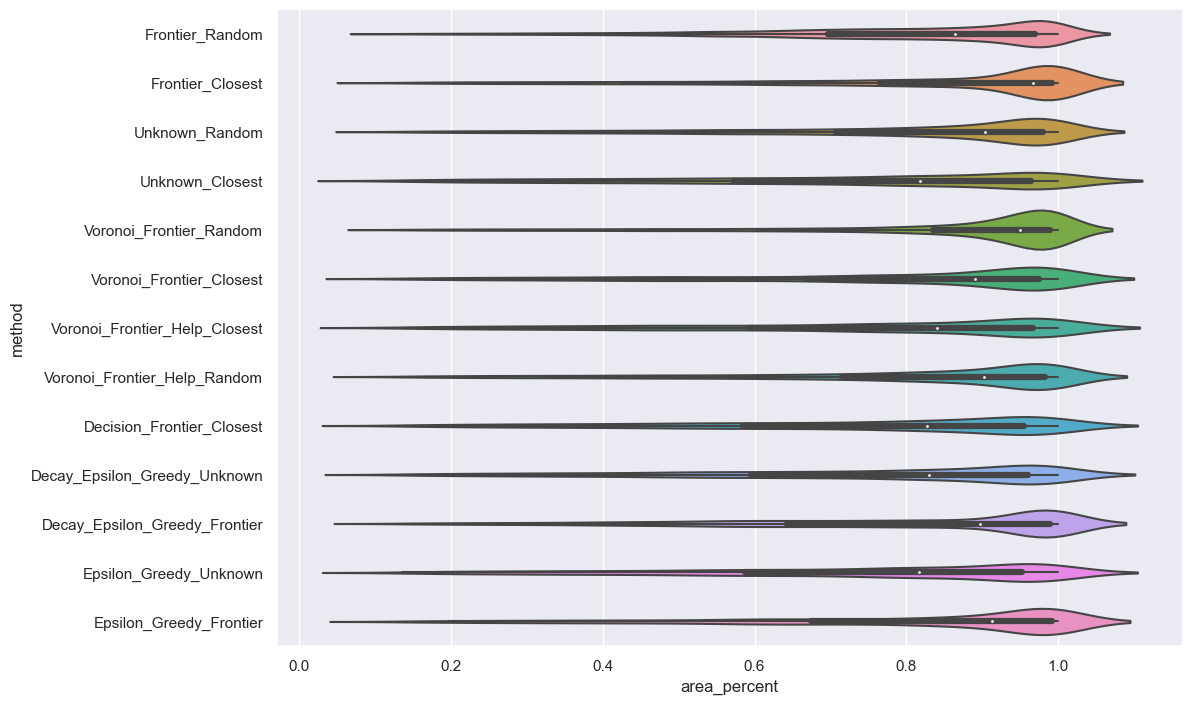

In [7]:
# sns plot of area_percent
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="area_percent", y="method", data=all_df)

<AxesSubplot:xlabel='area_percent', ylabel='method'>

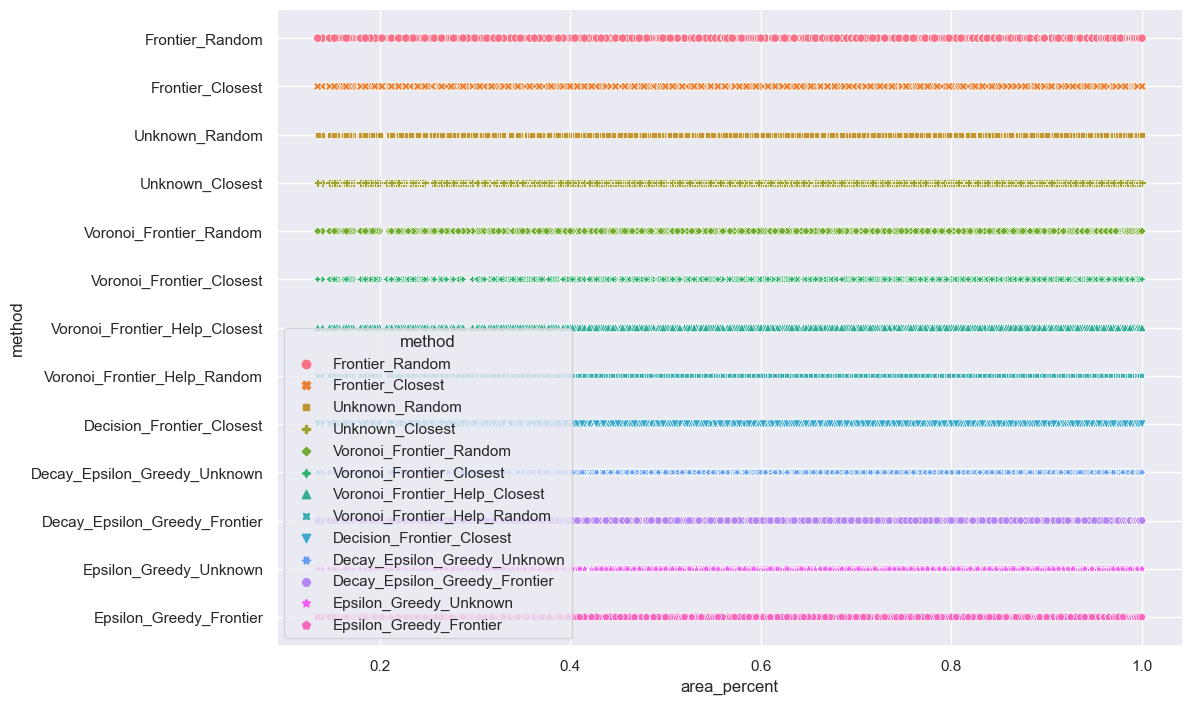

In [8]:
# plot of area_percent
sns.scatterplot(data=all_df, x="area_percent", y="method", hue="method", style="method")

<AxesSubplot:xlabel='frame_count', ylabel='area_percent'>

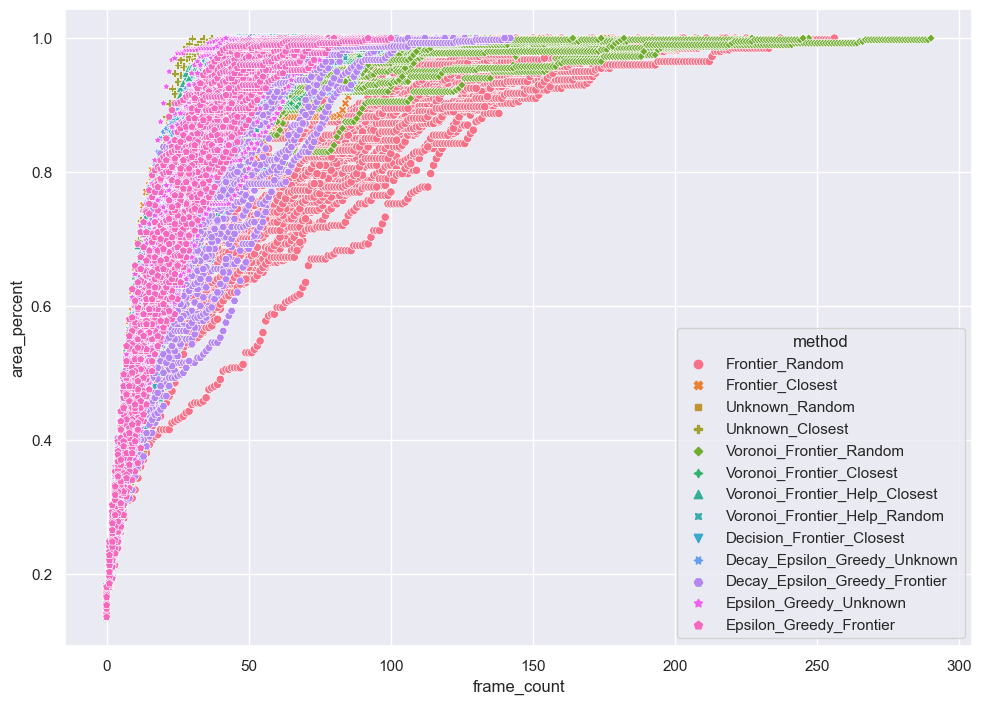

In [9]:
# y axis is the area_percent and the x axis is the frame_count, and the hue is the method
sns.scatterplot(data=all_df, x="frame_count", y="area_percent", hue="method", style="method")

('Decay_Epsilon_Greedy_Frontier',)
('Decay_Epsilon_Greedy_Unknown',)
('Decision_Frontier_Closest',)
('Epsilon_Greedy_Frontier',)
('Epsilon_Greedy_Unknown',)
('Frontier_Closest',)
('Frontier_Random',)
('Unknown_Closest',)
('Unknown_Random',)
('Voronoi_Frontier_Closest',)
('Voronoi_Frontier_Help_Closest',)
('Voronoi_Frontier_Help_Random',)
('Voronoi_Frontier_Random',)


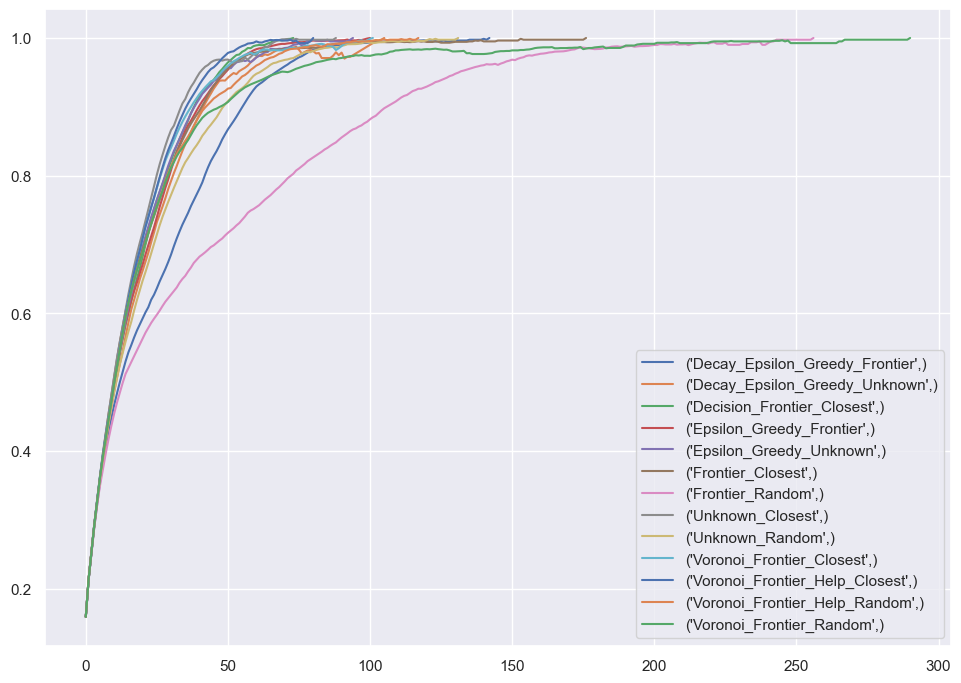

In [10]:
for group_name, group in all_df.groupby(['method']):
    print(group_name)
    count_group = group.groupby(['frame_count'])
    # count_group['area_percent'].mean().plot(label=group_name)
    plt.plot( count_group['area_percent'].mean(), label=group_name)
    # plt.plot(group['frame_count'], group['area_percent'], label=group_name)

plt.legend()